# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

#### Problem Statement:

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide **whether the new landing page is more effective to gather new subscribers.** Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

#### Objectives:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Do the users spend more time on the new landing page than the old landing page?
3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
5. Is the mean time spent on the new page same for the different language users?

## Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
%matplotlib inline 

import scipy.stats as stats

#read the data into the DataFrame 
data = pd.read_csv("abtest.csv")

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame. Add observations.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame. Add observations.

#### View a Few Rows of the Data Frame

In [3]:
#view a few rows of the data frame
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Check the Shape and Data Types of the Data Frame 

In [4]:
#checking the shape of the data 
data.shape

(100, 6)

* There are 100 rows and 6 columns

In [5]:
#inspecting the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* There are 2 numerical values and 4 objects that need to be converted to categorical data

#### Fix the Data-types 

In [6]:
#Fixing the data-types 
# Converting "objects" to "category" reduces the data space required to store the dataframe

for col in ['group', 'landing_page', 'converted', 'language_preferred']:
    data[col] = data[col].astype('category')

# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


* There are now 2 numerical values and 4 categorical values in this data

#### Missing Value Check 

In [7]:
# checking for missing values 
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

* There are no missing values in the data

#### Summary Statistics of the Data Frame

In [8]:
#summary statistics 
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observations 
* The mean time spent by the user on the landing page is about 5.38 minutes 
* The minimum time spent by the user on the landing page is 0.19 minutes 
* The maximum time spent by the user on the landing page is 10.71 minutes

### Univariate Analysis

In [9]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

#### Time Spent on the Page

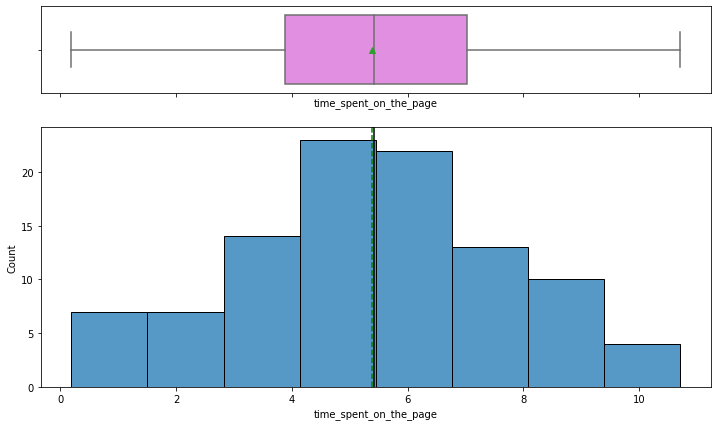

In [11]:
histogram_boxplot(data, "time_spent_on_the_page")

#### Observations
* The distribution of time spent on the page in normally distributed 
* The median of time spent on the page is around 5.4 minutes
* The mean of time spent on the page is around 5.4 minutes

#### Group

<Figure size 1080x504 with 0 Axes>

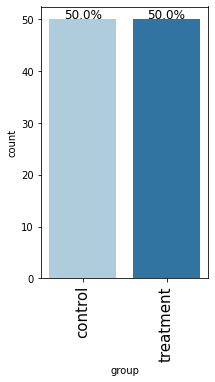

In [12]:
plt.figure(figsize=(15,7))
labeled_barplot(data, 'group', perc=True)

#### Observations
* There is one control group and one treatment group
* The control and treatment groups have an equal size sample 

#### Landing Page

<Figure size 1080x504 with 0 Axes>

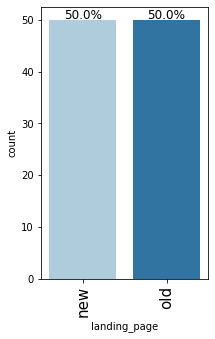

In [13]:
plt.figure(figsize=(15,7))
labeled_barplot(data, 'landing_page', perc=True)

#### Observations
* There is one new landing page and one old landing page
* The distribution of observations across the two landing pages are the same

#### Converted

<Figure size 1080x504 with 0 Axes>

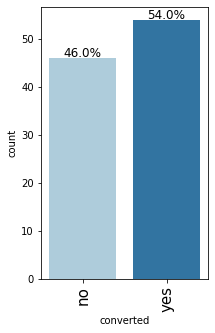

In [14]:
plt.figure(figsize=(15,7))
labeled_barplot(data, 'converted', perc=True)

#### Observations
* 46% of users did not convert to a subscriber of the news portal
* 54% of users converted to a subscriber of the news portal 

#### Language Preferred

<Figure size 1080x504 with 0 Axes>

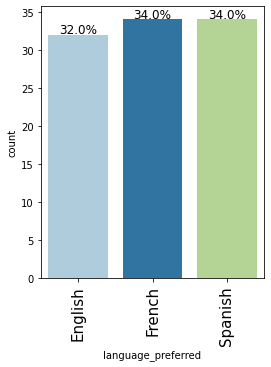

In [15]:
plt.figure(figsize=(15,7))
labeled_barplot(data, 'language_preferred', perc=True)

#### Observations
* 32% of users chose English as their language to view the landing page
* 34% of users chose French as their language to view the landing page
* 34% of users chose Spanish as their language to view the landing page

### Bivariate Analysis

#### Landing page vs. group

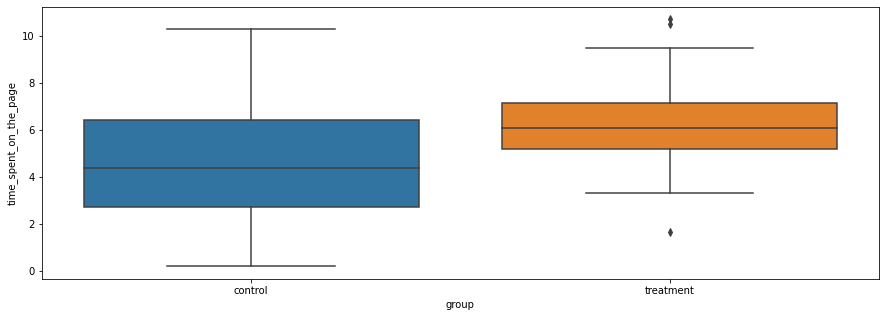

In [16]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='group', y='time_spent_on_the_page')
plt.show()

* Overall, the time spent on the page seems to be greater in the treatment group than the control group

#### Landing page vs. time spent on the page 

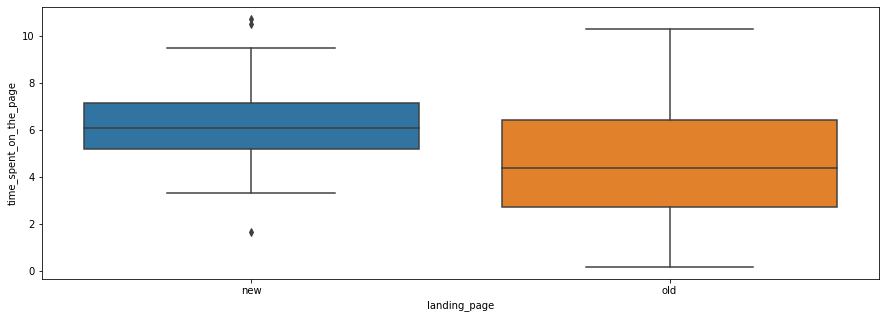

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='landing_page', y='time_spent_on_the_page')
plt.show()

* Overall, the time spent on the new page seems to be greater than time spent on the new page

#### Conversion status vs. Time spent on the new page

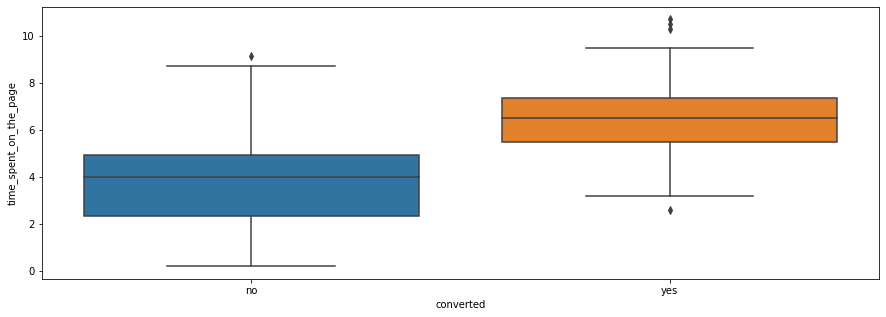

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='converted', y='time_spent_on_the_page')
plt.show()

* Overall, the users who get converted seem to spend more time on the page 

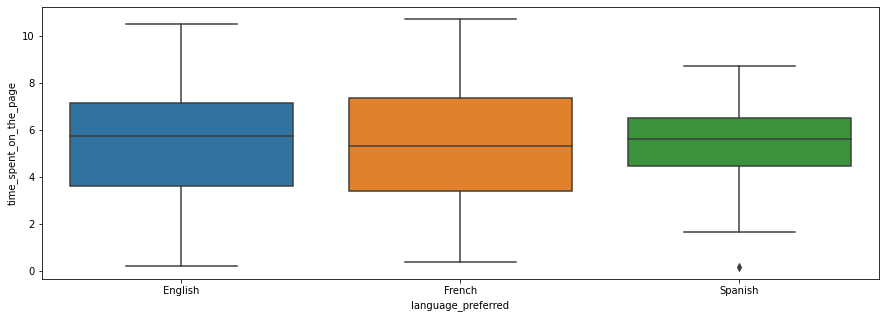

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='language_preferred', y='time_spent_on_the_page')
plt.show()

* The median time spent by the different language users are approximately equal 
* The mean time spent by the different language users are approximately equal 

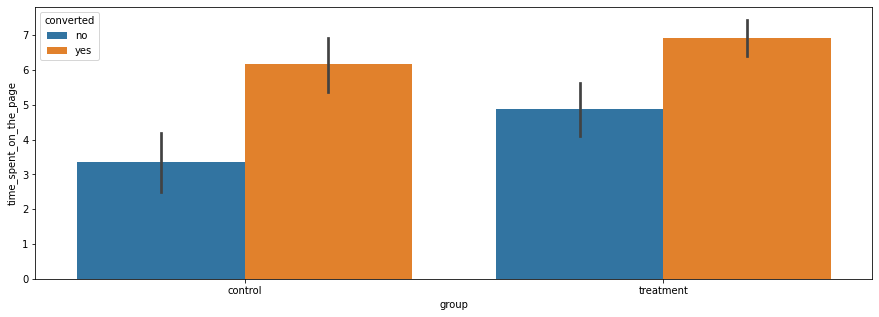

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='group', y='time_spent_on_the_page', hue='converted')
plt.show()

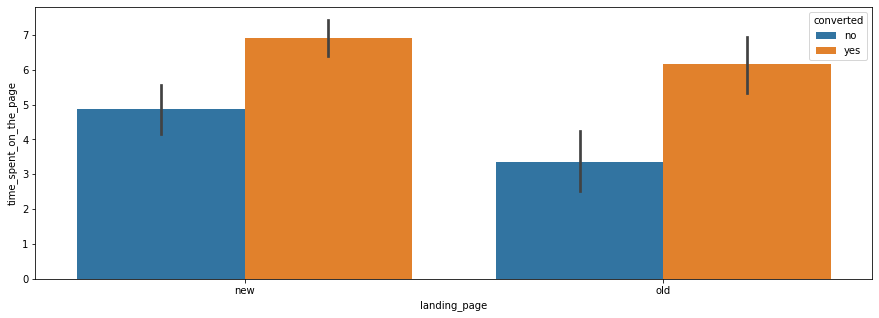

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='landing_page', y='time_spent_on_the_page', hue='converted')
plt.show()

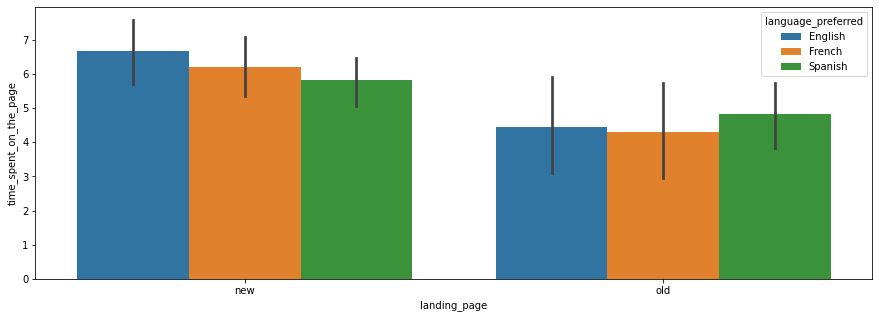

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='landing_page', y='time_spent_on_the_page', hue='language_preferred')
plt.show()

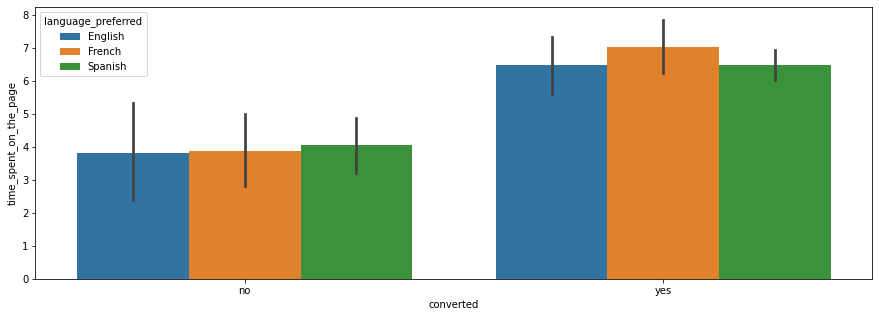

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='converted', y='time_spent_on_the_page', hue='language_preferred')
plt.show()

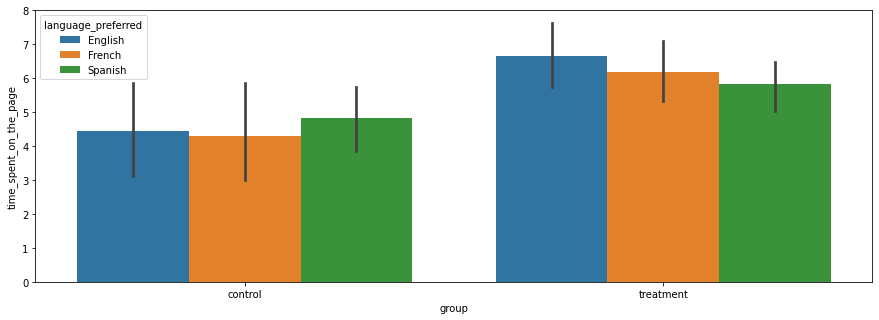

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='group', y='time_spent_on_the_page', hue='language_preferred')
plt.show()

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

In [25]:
data[data["landing_page"]=="new"].describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50.00000,50,50,50.000000,50,50
unique,NaN,1,1,NaN,2,3
top,NaN,treatment,new,NaN,yes,French
freq,NaN,50,50,NaN,33,17
mean,546467.50000,NaN,NaN,6.223200,NaN,NaN
std,14.57738,NaN,NaN,1.817031,NaN,NaN
min,546443.00000,NaN,NaN,1.650000,NaN,NaN
25%,546455.25000,NaN,NaN,5.175000,NaN,NaN
50%,546467.50000,NaN,NaN,6.105000,NaN,NaN
75%,546479.75000,NaN,NaN,7.160000,NaN,NaN


#### Observations
* The mean time spent on the page for the new landing page is about 6.22 minutes

In [26]:
data[data["landing_page"]=="old"].describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,50.00000,50,50,50.000000,50,50
unique,NaN,1,1,NaN,2,3
top,NaN,control,old,NaN,no,French
freq,NaN,50,50,NaN,29,17
mean,546566.50000,NaN,NaN,4.532400,NaN,NaN
std,17.67767,NaN,NaN,2.581975,NaN,NaN
min,546493.00000,NaN,NaN,0.190000,NaN,NaN
25%,546555.25000,NaN,NaN,2.720000,NaN,NaN
50%,546567.50000,NaN,NaN,4.380000,NaN,NaN
75%,546579.75000,NaN,NaN,6.442500,NaN,NaN


#### Observations
* The mean time spent on the page for the existing landing page is about 4.53 minutes

### Overall Observations
* Yes, users spent an average of about 1.69 minutes more on the new landing page than the existing one. 

### Perform Visual Analysis

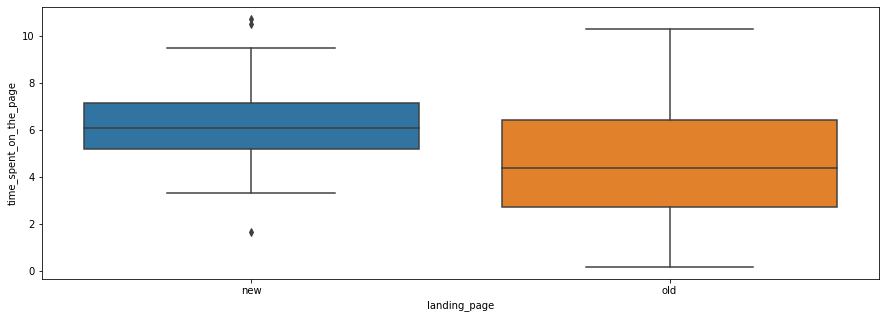

In [27]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data, x='landing_page', y='time_spent_on_the_page')
plt.show()

#### Observations
* According to the box plot, you can visualize that the new landing page has more online traffic than the old landing page

### Step 1: Define the null and alternate hypotheses

>$H_0: \mu_1 = \mu_2$ 

>$H_a: \mu_1 > \mu_2$

### Step 2: Select Appropriate test

This is a one-tailed test concerning two population means from two independent populations. As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

### Step 3: Decide the significance level

Here, we select α = 0.05

### Step 4: Collect and prepare data

In [28]:
new_landing = data.loc[data['landing_page'] == 'new', 'time_spent_on_the_page'] 
old_landing = data.loc[data['landing_page'] == 'old', 'time_spent_on_the_page']

In [29]:
new_landing.describe(include="all")

count    50.000000
mean      6.223200
std       1.817031
min       1.650000
25%       5.175000
50%       6.105000
75%       7.160000
max      10.710000
Name: time_spent_on_the_page, dtype: float64

In [30]:
old_landing.describe(include="all")

count    50.000000
mean      4.532400
std       2.581975
min       0.190000
25%       2.720000
50%       4.380000
75%       6.442500
max      10.300000
Name: time_spent_on_the_page, dtype: float64

* The mean time spent on the new landing page is 6.2232
* The mean time spent on the old landing page is 4.5324
* The standard deviation of the new landing page is 1.817031
* The standard deviation of the old landing page is 2.581975

### Step 5: Calculate the p-value

In [31]:
# import the required function
from scipy.stats import ttest_ind
# find the p-value
test_stat, p_value = ttest_ind(new_landing, old_landing, equal_var = False, alternative = 'greater')
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [32]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the mean time spent by the users on the new page is greater than the mean time spent by the users on the old page.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

### Two Proportion Z-Test

#### Null Hypothesis

>**$H_0: P_1 = P_2$**

#### Alternate Hypothesis

>**$H_a: P_1 > P_2$**

In [33]:
#import required function
from statsmodels.stats.proportion import proportions_ztest

In [34]:
#number of new converted
new_convertors = data[data['landing_page']== 'new'].converted.value_counts()['yes']
#number of old converted 
old_convertors = data[data['landing_page']=='old'].converted.value_counts()['yes']

print('The numbers of new and old convertors are {0} and {1} respectively'.format(new_convertors, old_convertors))

#number of visitors to new
n_new = data.landing_page.value_counts()['new']

#number of visitors to old 
n_old = data.landing_page.value_counts()['old']

print('The numbers of new and old visitors are {0} and {1} respectively'.format(n_new, n_old))

The numbers of new and old convertors are 33 and 21 respectively
The numbers of new and old visitors are 50 and 50 respectively


In [35]:
print(f' The proportions of convertors in new and old pages are {round(33/50,2)}, {round(21/50,2)}, respectively')

 The proportions of convertors in new and old pages are 0.66, 0.42, respectively


* The proportions of convertors in the new and old landing pages are 0.66, 0.42, respectively. 

### Calculate the P-Value

In [36]:
# find the p-value using proportion_ztest
stat, pval = proportions_ztest([new_convertors, old_convertors] , [n_new, n_old], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(pval))


The p-value is 0.008026308204056278


### Compare the P-Value with $\alpha$

In [37]:
#print the conclusion based on p-value 
if pval <0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else: 
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Conclusion
Since the pvalue is < 0.05, we reject the null hypothesis. Hence, we have enough statistical evidence to say that the proportion of users who visit the new landing page and get converted is greater than the conversion rate for the old page. 

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

### Chi-Square Test

>$H_0:$ Conversion is independent on preferred language.

>$H_a:$ Conversion is NOT independent on preferred language.

In [38]:
#import necessary packages
from scipy.stats import chi2_contingency #For Chi-Square Test

### Data Preperation 

In [39]:
#create the contigency table showing the distribution of the categorical variables
contingency_table = pd.crosstab(data['converted'], data['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Calculate P-Value

In [40]:
#use chi2_contigency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)

#print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


### Compare the p-value with $\alpha$

In [41]:
#print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:  
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Conclusion
Since the p-value is > 0.05, we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that conversion is independent on preferred language.

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

### One-Way ANOVA Test 

>$H_0: \mu_1 = \mu_2 = \mu_3$

>$H_a: $ At least one time spent on the page is different from the rest.

#### Shapiro-Wilk's Test

>$H_0:$ Time spent on the page follows a normal distribution

>$H_a: $ Time spent on the page does not follow a normal distribution

In [42]:
#Aussmption 1: Normality
w,p_value = stats.shapiro(data['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.5643684267997742


* Since the p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution

#### Levene's Test

>$H_0: $ All the population variances are equal

>$H_a: $ At least one variance is different from the rest

In [43]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(data['time_spent_on_the_page'][data['language_preferred']=="English"], 
                                   data['time_spent_on_the_page'][data['language_preferred']=="French"], 
                                   data['time_spent_on_the_page'][data['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.06515086840327314


* Since the p-value is large, we fail to reject the null hypothesis of homogenity of variances

#### Find the P-Value 

In [44]:
#import the required function 
from scipy.stats import f_oneway

#perform one way anova test
test_stat, p_value = f_oneway(data.loc[data['language_preferred'] == 'English', 'time_spent_on_the_page'], 
                              data.loc[data['language_preferred'] == 'French', 'time_spent_on_the_page'], 
                              data.loc[data['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print ('The p-value is', str(p_value))

The p-value is 0.8665610536012648


* Since the p-value is very large, we fail to reject the null hypothesis. Hence, we have enough statistical significance to conclude that the time spent on the new page is not different for different language users. 

In [45]:
#import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = data['time_spent_on_the_page'], groups = data['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.3058 0.8482 -1.7123 1.1006  False
English Spanish  -0.2273    0.9 -1.6338 1.1792  False
 French Spanish   0.0785    0.9 -1.3065 1.4635  False
-----------------------------------------------------


### Conclusion

We fail to reject the null hypothesis. Hence, we have enough statistical significance to conclude that the time spent on the new page is not different for different language users.

## Conclusion and Business Recommendations

* The proportion of users who visit the new landing page and get converted is greater than the conversion rate for the old page. 
* Conversion rate is independent on preferred language.
* Time spent on the new page is not different for different language users.
* The design team of the company's new landing page has recieved more traffic and has benefitted the company.
* **The new landing page is more effective to gather new subscribers.**
* The business should continue to update and create new pages periodically with growing trends. 
* The company should add more language options to the landing page in order to grow their customer base. 
* The company should continue conduct more studies to adjust their website to customer needs. 